In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("Copper alloy data set - Book2 (version 2).csv")

hidden_data = data.sample(40)
data = data[~data.index.isin(hidden_data.index)]

print(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1438
Data columns (total 34 columns):
Name                                                 1399 non-null object
Form                                                 1399 non-null object
Temper                                               1388 non-null object
Temper Code                                          1399 non-null object
Tensile Strength                                     1399 non-null object
Thermal ConductivityBtu/ sq ft/ ft hr/ °F at 68°F    1399 non-null float64
Cu(1.2.3                                             1399 non-null object
Pb                                                   1399 non-null float64
Zn                                                   1399 non-null float64
Fe                                                   1399 non-null float64
P                                                    1399 non-null float64
Ag                                                   1399 non-null float64

,Name,Form,Temper,Temper Code,Tensile Strength,Thermal ConductivityBtu/ sq ft/ ft hr/ °F at 68°F,Cu(1.2.3,Pb,Zn,Fe,...,Co,Al,Be,Cr,Si,Ti,Ca,Li,B,C
0,C10100 Oxygen-Free-Electronic,Flat Products,1/2 Hard,H02,42,226.0,99.99,0.0005,0.0001,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C10100 Oxygen-Free-Electronic,Flat Products,1/4 Hard,H01,38,226.0,99.99,0.0005,0.0001,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C10100 Oxygen-Free-Electronic,Flat Products,1/4 Hard,H01,38,226.0,99.99,0.0005,0.0001,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C10100 Oxygen-Free-Electronic,Flat Products,1/8 Hard,H00,36,226.0,99.99,0.0005,0.0001,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C10100 Oxygen-Free-Electronic,Flat Products,1/8 Hard,H00,36,226.0,99.99,0.0005,0.0001,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Questions from the data

#### A. Questions from the features
1. How many unique members do we have?
2. Which records have missing values? What pattern is there (if any) in the missingness?
3. What are the ranges in % of each composing element?
4. What are the different categories and how many observations of each do we have (Form, Temper, etc.)?
5. 

#### B. Questions from the target
1. What is the distribution of tensile strength and thermal conductivity?
2. Is there an effect of Temper, Form with the target variables (visually, TS vs C (hue=temper/form))?
3. How many high tensile strength/conductivity are there? (Important to select educated threshhold for high seperation)

#### C. Ideas
1. Features such as :
    * High, Intermediate, Low strength
    * High, Intermediate, Low conductivity
2. Normalise before modelling vs Don't normalise before modelling

# Data Exploration

# A.
#### A.1. Number of unique records in the data

In [13]:
mask = data.duplicated(keep='first') # Mask to identify duplicate records
duplicate_alloys = data[mask]

print("Total number of alloys in the dataset = {}".format(len(data)))
print("No. of duplicate records = {}".format(len(duplicate_alloys)))
print("Actual number of alloys in the data = {}".format(len(data)-len(duplicate_alloys)))

# Uncomment the code below to inspect the duplicate records
# duplicate_alloys

Total number of alloys in the dataset = 1399
No. of duplicate records = 107
Actual number of alloys in the data = 1292


#### A.2. Inspecting missing values

In [14]:
missing = data.isnull()
missing_count_series = missing.sum()
missing_count_df = pd.DataFrame(missing_count_series, columns=["num_missing"])

subset_mask = missing_count_df.num_missing > 0  # Returns true for columns which have missing values
subset_df = missing_count_df.loc[subset_mask].T

# Records with NA values
na_df = data[missing.any(axis=1)]

# Uncomment na_df to Inspect the records with missing values
subset_df
# na_df

,Temper,Cd
num_missing,11,1


In [15]:
data.O.replace('O', 0).astype('float').unique()
for col in data:
    unique = data[col].unique()
    print("{} ({}) : \n{}\n".format(col,len(unique), unique))

Name (130) : 
['C10100 Oxygen-Free-Electronic' 'C10200 Oxygen-Free'
 'C10300       Oxygen-Free Copper' 'C10400    Oxygen-Free with Ag'
 'C10500 Oxygen-Free with Ag' 'C10700 Oxygen-Free with Ag' 'C10800 OLFP'
 'C10910' 'c11300-Tough Pitch with Ag (STP'
 'c11400 Tough Pitch with Ag (STP' 'C11500 Tough Pitch with Ag'
 'C11600 Tough Pitch with Ag'
 'C12000 Phosphorus-Deoxidized, Low Residual P'
 'c12100Phosphorus-Deoxidized, Low Residual P'
 'C12200 Phosphorus-Deoxidized, High Residual P' 'C12210'
 'C12500 Fire-Refined Tough Pitch' 'c12600'
 'C12900 Fire-Refined Tough Pitch with Ag'
 'C14200 Phosphorus-Deoxidized, Arsenical'
 'C14300 Cadmium Copper, Deoxidized' 'C14425 Copper\r\n'
 'C14500 Tellurium-Bearing' 'C14500 Tellurium-Bearing '
 'C14510 Tellurium-Bearing'
 'C14520 Phosphorus-Deoxidized,Tellurium-Bearing' 'C14530*'
 'C14700 Sulfur-Bearing' 'C15000 Zirconium Copper' 'C15100' 'c15100'
 'C15150' 'C15500*' 'C15650 MA5J\r\nCopper'
 'c15715 Dispersion Strengthened Alloy'
 'C15720 Dispersi

#### A.3. Visualize the range of different columns

The numerical columns of the dataset lie in different ranges of values. **Scaling/normalization is recommended.**

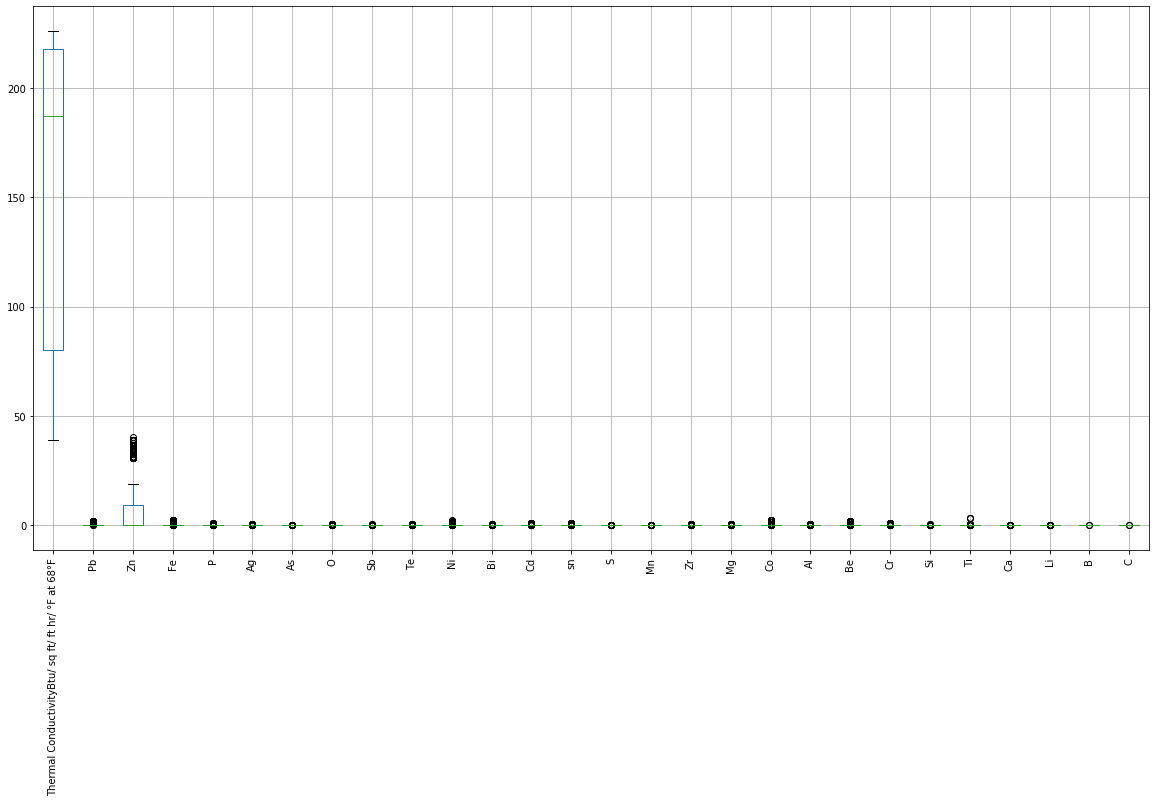

In [16]:
fig,ax = plt.subplots(figsize=(20,10))
data.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

**Issues with the data**

1. The following columns need to be inspected for content and datatype inconsistency:
    * Form
    * Temper (contains a nan value)
    * Tensile Strength (contains \xa, Typ, Min, etc.), therefore it's of the type 'object'.
    * Thermal Conductivity and Cd contain nan values

#### A.4. Unique values in categorical features viz. Form, Temper, etc. (Tensile Strength, too)


C:\Users\Pandey\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Pandey\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


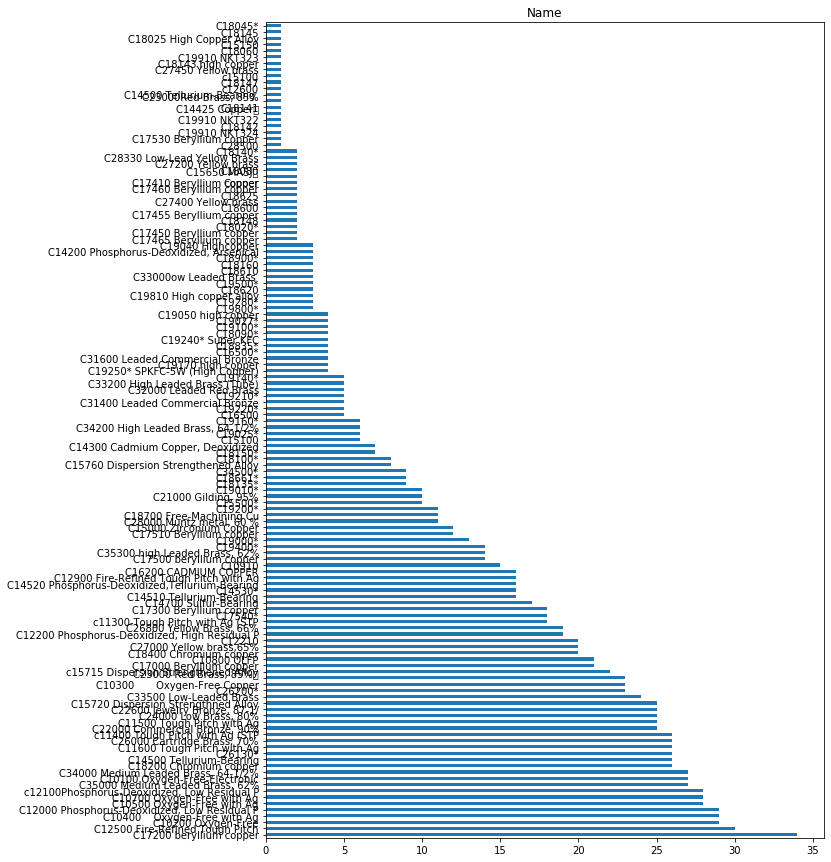

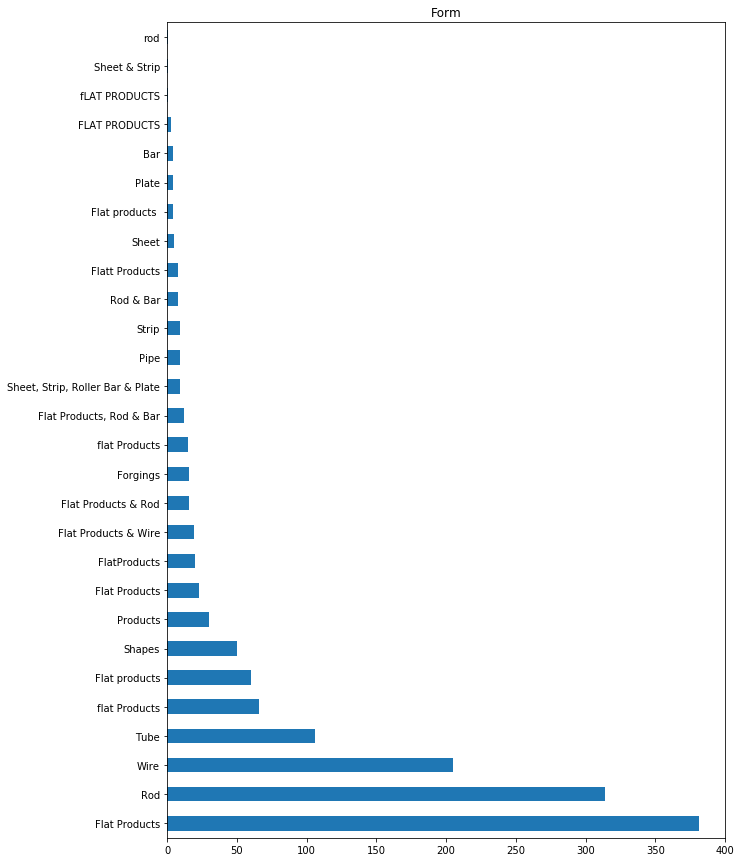

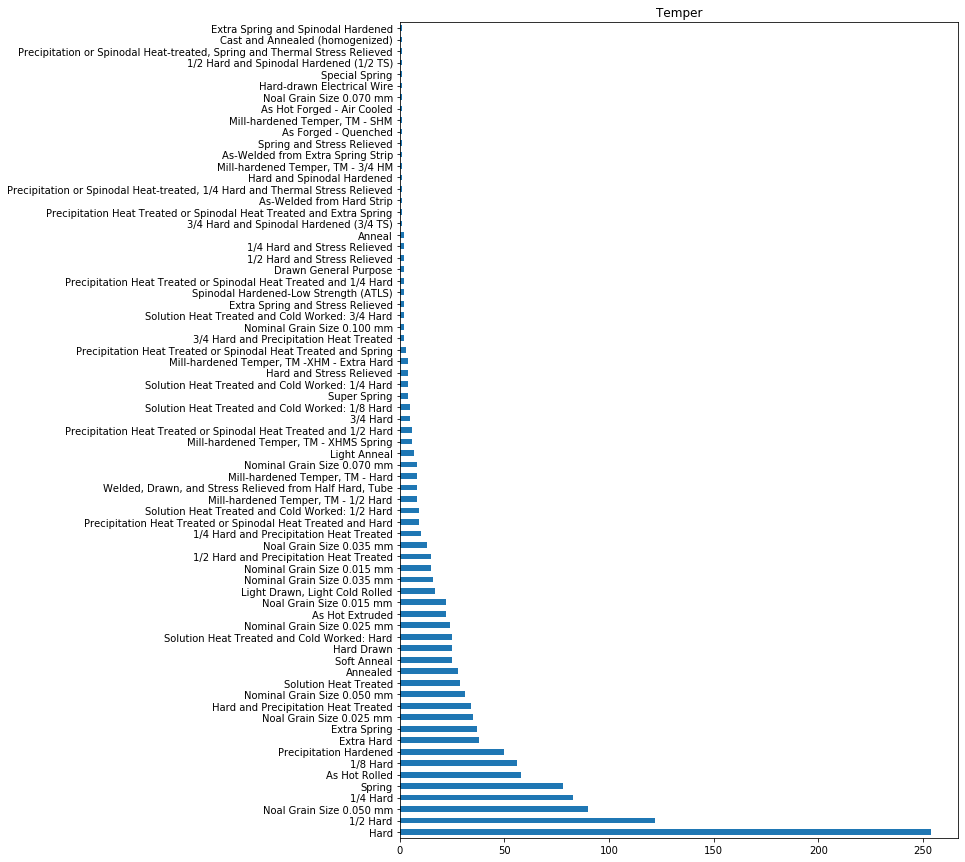

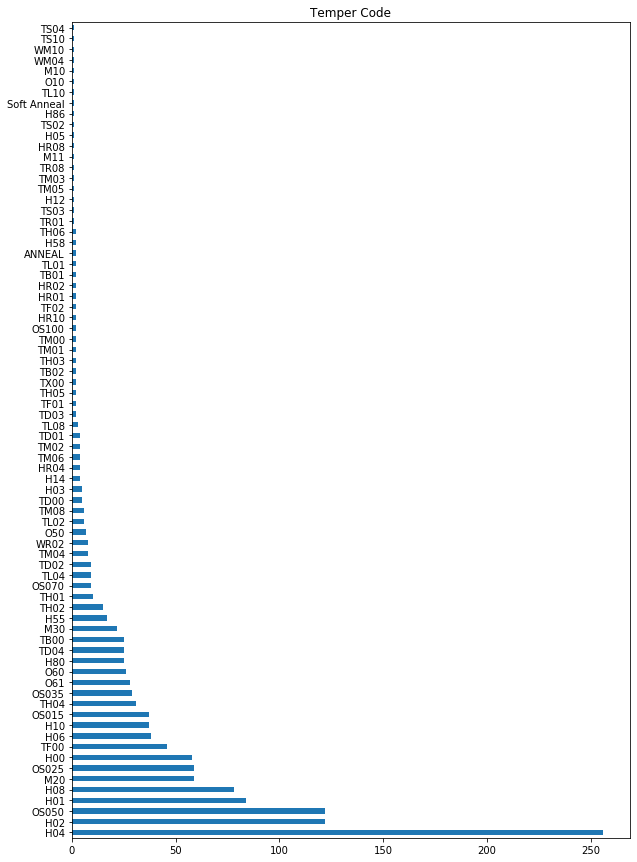

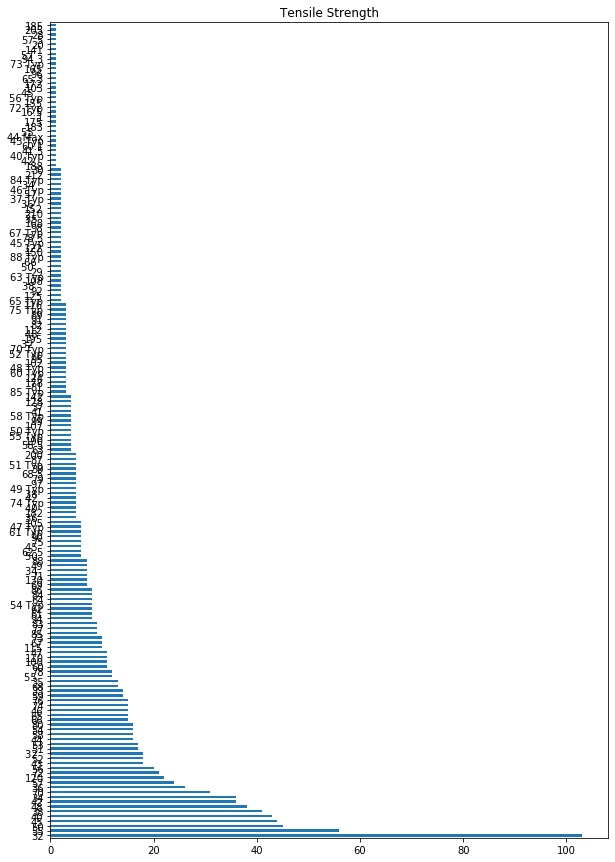

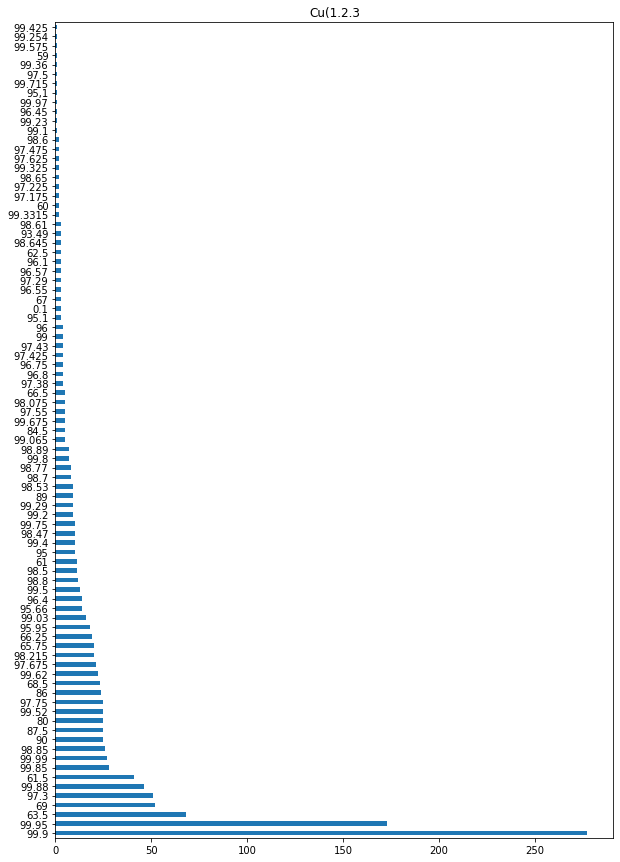

In [17]:
for col in data.select_dtypes(exclude='number'):
    plt.figure(figsize=(10,15))
    u = data[col]
    u.value_counts().plot(kind='barh')
    plt.title(col)
    plt.show()

# B.
#### B.1. Distribution of the target variables

In [18]:
def transform_tstrength(data):
    
    # Code to clean the Tensile Strength Column
    new_data = data.copy()
    
    noise_elements = [' \xa0', ' Min', ' Typ']
    
    # Remove noise elements from observations
    for ele in noise_elements:
        new_data['Tensile Strength'] = new_data['Tensile Strength'].apply(lambda x: x.replace(ele, ""))
    # Remove trailing whitespace
    new_data['Tensile Strength'] = new_data['Tensile Strength'].apply(lambda x: x.strip())
    # Convert to numeric type
    new_data['Tensile Strength'] = new_data['Tensile Strength'].astype('float')
    
    return new_data

clean_df = transform_tstrength(data)

targets = clean_df[['Tensile Strength','Thermal ConductivityBtu/ sq ft/ ft hr/ °F at 68°F']].dropna(axis=0)
targets.columns = ['ts', 'tc']
targets.describe()

ValueError: could not convert string to float: '44 Max'

In [ ]:
targets.corr()

In [ ]:
for col in targets:
#     sns.distplot(targets[col].dropna(axis=0))
    sns.boxplot(targets[col].dropna(axis=0))
    plt.show()
    
plt.scatter(targets.tc, targets.ts)
plt.title("Thermal Conductivity vs. Tensile Strength")
plt.xlabel('Thermal Conductivity')
plt.ylabel('Tensile Strength')
plt.show()

In [ ]:
targets.sort_values(by=['ts','tc'], ascending=False)

In [ ]:
fig,ax = plt.subplots(figsize=(20,15))
sns.scatterplot('tc', 'ts', data=targets, hue=data['Temper'], palette='colorblind', s=100)
plt.xlabel("Thermal Conductivity", fontsize=16)
plt.ylabel("Tensile Strength", fontsize=16)
plt.show()